In [1]:
!pwd
!ls

/Users/svenjalueg/Analytical Tools and the Study of the Bible Code
Assignment 07 Text-Fabric Svenja Lueg.ipynb
BJD Excel.xlsx
BJD extended.xlsx
Distribution <LJD.ipynb
Distribution BJD.ipynb
TF1.ipynb
bjd.csv
~$BJD Excel.xlsx
~$BJD extended.xlsx


In [2]:
import sys, collections, os
import pprint as pp
import pandas as pd
import numpy as np
from enum import Enum, IntEnum
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from tf.app import use

A = use('ETCBC/bhsa:hot', hoist=globals())

**Locating corpus resources ...**

rate limit is 60 requests per hour, with 57 left for this hour
To increase the rate,see https://annotation.github.io/text-fabric/tf/advanced/repo.html#github
	connecting to online GitHub repo ETCBC/bhsa ... connected


Name,# of nodes,# slots/node,% coverage
book,39,10938.21,100
chapter,929,459.19,100
lex,9230,46.22,100
verse,23213,18.38,100
half_verse,45179,9.44,100
sentence,63717,6.70,100
sentence_atom,64514,6.61,100
clause,88131,4.84,100
clause_atom,90704,4.70,100
phrase,253203,1.68,100


In [4]:
al_kp_dict = {}

for w in F.otype.s('word'):
    if F.lex.v(w) == 'KP/' and F.lex.v(w-1) == '<L':
        
        bo, ch, ve = T.sectionFromNode(w)
        
        sentence = L.u(w, 'sentence')[0]
        sentence_hebr = T.text(sentence, ftm="text-trans-plain")
        sentence_tl = T.text(sentence, fmt="text-trans-plain")
        
        clause = L.u(w, 'clause')[0]
        clause_hebr = T.text(clause, ftm="text-trans-plain")
        clause_tl = T.text(clause, fmt="text-trans-plain")
        
        phrase = L.u(w, 'phrase')[0]
        function = F.function.v(phrase)
        subj = 'NA'
        objc = 'NA'
        verb = 'nominal clause'
        tense = 'NA'
        stem = 'NA'
        predicate_type = 'NA'
        
        #checking potential modifications for bjd:
        #(1)pronominal suffix,
        #(2) noun or noun phrase in the absolute state following bjd in the absolute state, or
        #(3) adjective or modifying participle
        
        modifier_al_kp = 'NA'
        ps = F.prs_ps.v(w)
        nu = F.prs_nu.v(w)
        gn = F.prs_gn.v(w)
                        
        if ps in {'NA', 'unknown'}:
            ps = ''
        if nu in {'NA', 'unknown'}:
            nu = ''
        if gn in {'NA', 'unknown'}:
            gn = ''
        modifier_al_kp = ps+nu+gn
        
        if modifier_al_kp == '':
            modifier_al_kp = 'NA'
            if F.st.v(w) == 'c' and F.st.v(w+1) == 'a':
                modifier_al_kp = T.text((w+1), fmt="text-trans-plain")
            elif F.st.v(w) == 'c':
                modifier_al_kp = T.text(phrase, fmt="text-trans-plain")
            elif F.sp.v(w+1) == 'adjv':
                modifier_al_kp = T.text((w+1), fmt="text-trans-plain")
            elif F.vt.v(w+1) in {'ptca', 'ptcp'}:
                modifier_al_kp = T.text((w+1), fmt="text-trans-plain")
        
        phrases = L.d(clause, 'phrase')
       
        for phr in phrases:
            if F.function.v(phr) in {'Pred', 'PreC'}:
                words = L.d(phr, 'word')
                for word in words:
                    if F.sp.v(word) == 'verb':
                        verb = F.lex.v(word)
                        tense = F.vt.v(word)
                        stem = F.vs.v(word)
                predicate_type = F.function.v(phr)
            elif F.function.v(phr) == 'PreO':
                words = L.d(phr, 'word')
                for word in words:
                    if F.sp.v(word) == 'verb':
                        verb = F.lex.v(word)
                        tense = F.vt.v(word)
                        stem = F.vs.v(word)
                        
                        ps = F.prs_ps.v(word)
                        nu = F.prs_nu.v(word)
                        gn = F.prs_gn.v(word)
                        
                        if ps in {'NA', 'unknown'}:
                            ps = ''
                        if nu in {'NA', 'unknown'}:
                            nu = ''
                        if gn in {'NA', 'unknown'}:
                            gn = ''
                        objc = ps+nu+gn
                        if objc == '':
                            objc = 'NA'
                            
                predicate_type = F.function.v(phr)
            elif F.function.v(phr) == 'PreS':
                words = L.d(phr, 'word')
                for word in words:
                    if F.sp.v(word) == 'verb':
                        verb = F.lex.v(word)
                        tense = F.vt.v(word)
                        stem = F.vs.v(word)
                        subj = F.prs.v(word)
                predicate_type = F.function.v(phr)
            elif F.function.v(phr) == 'Objc':
                objc = T.text(phr, fmt="text-trans-plain")
            elif F.function.v(phr) == 'Subj':
                subj = T.text(phr, fmt="text-trans-plain")
            else:
                continue
        
        if subj == 'NA':
            for phr in phrases:
                if F.function.v(phr) in {'Pred', 'PreC', 'PreO', 'PreS'}:
                    if F.function.v(phr) == 'PreS':
                        words = L.d(phr, 'word')
                        for word in words:
                            if F.sp.v(word) == 'verb':
                                ps = F.prs_ps.v(word)
                                nu = F.prs_nu.v(word)
                                gn = F.prs_gn.v(word)
                    else:
                        words = L.d(phr, 'word')
                        for word in words:
                            if F.sp.v(word) == 'verb':
                                ps = F.ps.v(word)
                                nu = F.nu.v(word)
                                gn = F.gn.v(word)
                
                    if ps in {'NA', 'unknown'}:
                        ps = ''
                    if nu in {'NA', 'unknown'}:
                        nu = ''
                    if gn in {'NA', 'unknown'}:
                        gn = ''
                    subj = ps+nu+gn
                    if subj == '':
                        subj = 'NA'
                else:
                    continue
        
        info = [w, bo, ch, ve,
                sentence_hebr, sentence_tl, clause_hebr, clause_tl,
                verb, tense, stem, predicate_type,
                function, subj, objc, modifier_al_kp
               ]
        
        al_kp_dict[w] = info

In [5]:
header = [
    'slot', 'book', 'chapter', 'verse',
    'sentence_hebr', 'sentence_tl', 'clause_hebr', 'clause_tl',
    'verb', 'tense', 'stem', 'predicate_type',
    'function_bjd', 'subject', 'object', 'modifier_al_kp'
]

al_kp_df = pd.DataFrame(al_kp_dict).T
al_kp_df.columns = header
print(al_kp_df.shape)
print(al_kp_df.head(10))

(30, 16)
        slot       book chapter verse   
18059  18059    Genesis      32    33  \
22119  22119    Genesis      40    11   
22330  22330    Genesis      40    21   
45064  45064     Exodus      29    24   
45068  45068     Exodus      29    24   
56650  56650  Leviticus       8    27   
56654  56654  Leviticus       8    27   
56669  56669  Leviticus       8    28   
58290  58290  Leviticus      11    27   
60574  60574  Leviticus      14    15   

                                           sentence_hebr   
18059  עַל־כֵּ֡ן לֹֽא־יֹאכְל֨וּ בְנֵֽי־יִשְׂרָאֵ֜ל אֶ...  \
22119       וָאֶתֵּ֥ן אֶת־הַכֹּ֖וס עַל־כַּ֥ף פַּרְעֹֽה׃    
22330          וַיִּתֵּ֥ן הַכֹּ֖וס עַל־כַּ֥ף פַּרְעֹֽה׃    
45064  וְשַׂמְתָּ֣ הַכֹּ֔ל עַ֚ל כַּפֵּ֣י אַהֲרֹ֔ן וְע...   
45068  וְשַׂמְתָּ֣ הַכֹּ֔ל עַ֚ל כַּפֵּ֣י אַהֲרֹ֔ן וְע...   
56650  וַיִּתֵּ֣ן אֶת־הַכֹּ֔ל עַ֚ל כַּפֵּ֣י אַהֲרֹ֔ן ...   
56654  וַיִּתֵּ֣ן אֶת־הַכֹּ֔ל עַ֚ל כַּפֵּ֣י אַהֲרֹ֔ן ...   
56669      וַיִּקַּ֨ח מֹשֶׁ֤ה אֹתָם֙ מֵעַ֣ל כַּפֵּיהֶ֔ם    

In [11]:
al_kp_df.to_csv("<l_kp.csv", sep="\t", index=False)

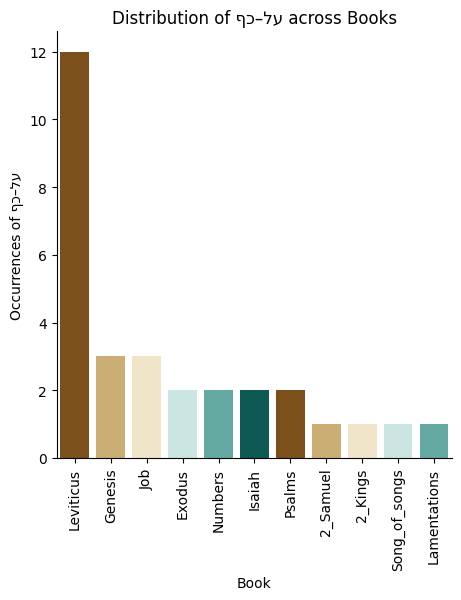

In [8]:
colors = ['#8c510a', '#d8b365', '#f6e8c3', '#c7eae5', '#5ab4ac', '#01665e']

g = sns.catplot(
    data=al_kp_df,
    x='book',
    y=None,
    kind = 'count',
    palette=colors,
    order = al_kp_df['book'].value_counts().index
)

g.set_xticklabels(rotation = 90)
g.set(xlabel='Book', ylabel='Occurrences of ףכ–לע', title = 'Distribution of ףכ–לע across Books')

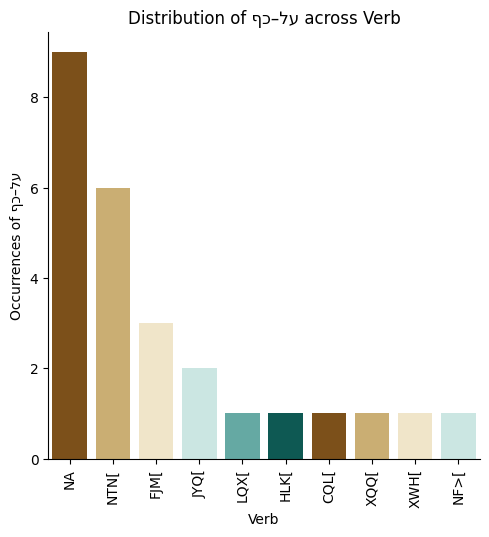

In [9]:
colors = ['#8c510a', '#d8b365', '#f6e8c3', '#c7eae5', '#5ab4ac', '#01665e']

g = sns.catplot(
    data=al_kp_df,
    x='verb',
    y=None,
    kind = 'count',
    palette=colors,
    order = al_kp_df['verb'].value_counts().iloc[:10].index
)

g.set_xticklabels(rotation = 90)
g.set(xlabel='Verb', ylabel='Occurrences of ףכ–לע', title = 'Distribution of ףכ–לע across Verb')

In [10]:
number_of_occurrences = {}

for verb in al_kp_df['verb']:
    count = al_kp_df['verb'].value_counts()[verb]
    number_of_occurrences[verb] = count

number_of_occurrences = dict(sorted(number_of_occurrences.items(), key=lambda item: item[1]))
number_of_occurrences

{'LQX[': 1,
 'HLK[': 1,
 'CQL[': 1,
 'XQQ[': 1,
 'XWH[': 1,
 'NF>[': 1,
 'CJT[': 1,
 'FPQ[': 1,
 'KSH[': 1,
 'SPQ[': 1,
 'JYQ[': 2,
 'FJM[': 3,
 'NTN[': 6,
 'NA': 9}